<a href="https://colab.research.google.com/github/zakaria-grid/GridPack/blob/master/NRG_Project_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem 1**

### **Question**: If an event has log-odds 3.2, what is the probability of this event? 

###**Answer**:

In [ ]:
import numpy as np 

p=np.exp(3.2)/(1+np.exp(3.2))
print(p)

0.9608342772032357




---



#**Problem 2**

###**Question**: Fit a model to the height_data.csv file. For every 10 units of increase in weight, how much taller does the model predict a person gets? 

###**Answer:**

In [ ]:
#Import the required librairies

from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
from numpy import arange

In [ ]:
# Import the data located on googd drive 

from google.colab import drive
import pandas

drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/ML_Project'

#Read the data
data = pandas.read_csv("heigh_data.csv") 

#Select only the height and weight features
data = data.loc[:, ['height', 'weight']]

Mounted at /content/gdrive
/content/gdrive/My Drive/ML_Project


In [ ]:
data

,height,weight
0,151.765,47.825606
1,139.700,36.485807
2,136.525,31.864838
3,156.845,53.041914
4,145.415,41.276872
...,...,...
539,145.415,31.127751
540,162.560,52.163080
541,156.210,54.062497
542,71.120,8.051258


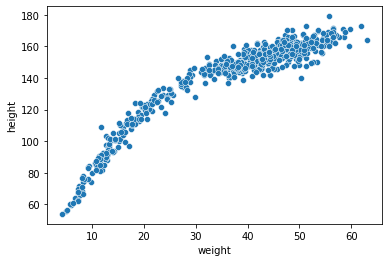

In [ ]:
#check the data distribution 
sns.scatterplot(x="weight",y='height', data=data)

In [ ]:
#Prepare data for training a linear regression model 

#converting data into arrays
dataset=data.values
height = dataset[0:,0:1]
weight = dataset[0:,1:2]

# Fit a linear regression model
model = LinearRegression(fit_intercept=True)
model.fit(weight,height) 
print('Height = %.5f * Weight + %.5f' % (model.coef_, model.intercept_))

Height = 1.76430 * Weight + 75.43591


In [ ]:
#Check the model performance by computing the R2 regression score
linear_prediction=model.predict(weight)
print ('R2: ', r2_score(linear_prediction,height))

R2:  0.8702434113181764


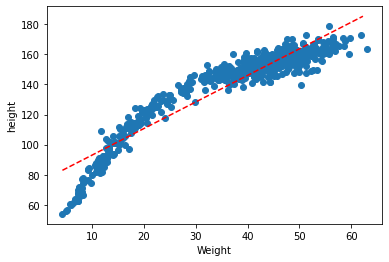

In [ ]:
# Plot a trend line on the scatter plot. 

# Compute the weight line using some inputs and their respective height line
weight_line = arange(min(weight), max(weight), 1)
height_line = weight_line* model.coef_+ model.intercept_
#Plot scatter plot 
plt.scatter(weight, height)
#Plot the trend line
plt.plot(weight_line, height_line[0,:], '--', color='red')
plt.xlabel('Weight')
plt.ylabel('height')
plt.show()

###**Answer to the question:** 
The model predicts that a person's height will increase by 1.76 units for every unit of weight. Thus, for 10 units of weight, the height would increase by 17.6 units.
It is worth mentioning that this linear regression model doesn't fit perfectly the data, as evidenced by the R2 value, and, therefore, other nonlinear regression models could potentially enhance the performance even further. 



---



#Problem 3

### **Question**: Fit a model on time to event data found in the survival_data.csv file. Explain how different variables (var1, var2, and var3) might influence hazards. 

### **Answer:** 

In [ ]:
pip install lifelines # Survival analysis required package

In [ ]:
from lifelines import KaplanMeierFitter #Survival analysis library
from sklearn.preprocessing import LabelEncoder #Converting feature types library

In [ ]:
#Read the data
data = pandas.read_csv("survival_data.csv")

#Check event (E) type
print((data['E'].dtype))



int64


In [ ]:
# Prepare the data before fitting the Keplan Meier model


#Convert event (E) to a binary feature
encoder = LabelEncoder()
data['E'] = encoder.fit_transform(data['E'])

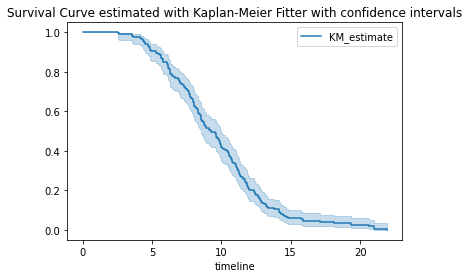

In [ ]:
# Fit the model
km = KaplanMeierFitter()
km.fit(data['T'], data['E'])
# Plot the survival function with confidence interval

km.plot_survival_function()
plt.title('Survival Curve estimated with Kaplan-Meier Fitter with confidence intervals')
plt.show()

In [ ]:
# Computer the influence of var1, var2, var3 on the hazards.

from lifelines import CoxPHFitter
# Fit the Cox model
cox = CoxPHFitter(alpha=0.05) # 95% confidence interval
cox.fit(data, duration_col='T', event_col='E')
# model summary
cox.print_summary()

<lifelines.CoxPHFitter: fitted with 200 total observations, 11 right-censored observations>
             duration col = 'T'
                event col = 'E'
      baseline estimation = breslow
   number of observations = 200
number of events observed = 189
   partial log-likelihood = -807.62
         time fit was run = 2022-03-07 06:48:42 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
var1        0.22       1.25       0.07             0.08             0.37                 1.08                 1.44
var2        0.05       1.05       0.08            -0.11             0.21                 0.89                 1.24
var3        0.22       1.24       0.08             0.07             0.37                 1.07                 1.44

             z      p   -log2(p)
covariate                       
var1      2.99 <0.005       8.49
var2      0.61   0.54       0.89
var3      2.88 <0.005       7.97
---
Concordance = 0.58
Partial AIC = 1621.24
log-likelihood ratio test = 15.54 on 3 df
-log2(p) of ll-ratio test = 9.47

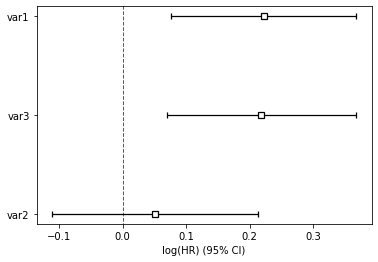

In [ ]:
# Plot factor effects 
coxph.plot()

In [ ]:
# Check the model assumptions
coxph.check_assumptions(data)

Proportional hazard assumption looks okay.


/usr/local/lib/python3.7/dist-packages/lifelines/fitters/mixins.py:108: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  for variable in self.params_.index & (columns or self.params_.index):


[]

###**Answer:** 

The p-value for var1 is less than 0.005 and the Hazard Ratio (HR) is 1.25;
Indicating a strong relationship between var1 and increased hazards with 95% confidence. 

The p-value for var2 is 0.54 and the HR is 1.05, indicating that var2 is insignificant and is making a small contribution to the difference in HR. 

The p-value for var3 is less than 0.005 and the HR is 1.24, suggesting a strong correlation between var3 and increased hazards with 95% confidence. 

The HR for Var1 is slightly greater than that for Var3, meaning that the former is more influential than the latter.  

As can be seen from the plot above, var2, which is close to 0, has a smaller influence compared to var1 and var3. 

Accordingly, it can be concluded with a 95% confidence level that var1 has a larger impact, followed by var3; whereas var2 has a negligible effect. 

